# In this project we perform topic modeling, sentiment analysis, and emotion analysis

Author: Jiang AiGuo

# **Load Tweets**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
import os
os.chdir('/content/drive/MyDrive/AG/NUS ISS Master/PLP-Practice Module for group 12/AG')

In [6]:
import numpy as np
import pandas as pd
tweets = pd.read_csv('tweets.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [7]:
tweets = tweets.dropna(how='any',axis=0).reset_index(drop=True)

In [8]:
import re
import string

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, SnowballStemmer
from nltk.tokenize import sent_tokenize, TweetTokenizer

nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

In [9]:
pd.set_option('max_colwidth', None)
#pd.reset_option('max_colwidth')

# **Preprocess for topic modeling**

nltk.TweetTokenizer vs nltk.word_tokenize --> both tokenizers almost work the same way, to split a given sentence into words. But you can think of TweetTokenizer as a subset of word_tokenize. TweetTokenizer keeps hashtags intact while word_tokenize doesn't.

In [28]:
# S’pore Airport’s 5,092 you’re ‘corona Chinese‘
custom_stopwords = ["..","...","ha","TIME","EMAIL","URL","sg","singapore","covid19","coronavirus", "covid","19","wuhan",
                    "‘","‘",".","via","wa","go","u","would","could","really","much","also","said","please","b","f","cant"
                          "like", "new", "day", "days","year", "ive", "cos", "guys", "didnt", "time", "people", "dont", 
                          "today", "thing", "week", "months", "post","yesterday", "man", "wont", "lets", "don", "feel", 
                          "feeling", "gonna","isnt", "pls", "share", "wait", "wanna", "back", "means","fuck", "fucking", 
                          "lah", "good","due", "ingat", "just", "will", "can", "now", "get", "can", "one", "even", "just",
                          "ada", "got", "going", "last", "etc", "kaypo", "still", "chibai", "woodlands", "say", "know", 
                          "virus","situation", "need", "want", "take", "come", "look","think", 'actually', 'especially',
                          'later', 'guess', 'note', 'dear', 'road', 'start', 'stop', 'things', 'give', 'try', 'tell', 
                          'shit', 'maybe', 'keep', 'right','time', 'stacy', 'iwas','mall','bedok', 'control', 
                          'lawrence', 'wong', 'lawrence_wong', 'feel_like', "t.co","http","https","amp"]

In [30]:
from sentiment.dataset.tokenizer import SimpleTokenizer
tokenizer = SimpleTokenizer()
text = tweets['Text']
toks = text.apply(tokenizer) #1min15s

In [ ]:
#toks = [[ word for word in tok if word not in ['URL','TIME','EMAIL'] ] for tok in toks] #added into stopwords

# **Topic modeling: TFIDF + KMeans**

In [32]:
class SimpleTokenizer1(SimpleTokenizer):
    """
    Updated tokenizer
    """
    def __init__(self):
        super().__init__()
        self.tokenizer_words = TweetTokenizer()
        self.stemmer = SnowballStemmer('english')
        self.stop = set(stopwords.words('english')+custom_stopwords)
        self.lemma = WordNetLemmatizer()


tokenizer1 = SimpleTokenizer1()
text1 = tweets['Text']
toks1 = text1.apply(tokenizer1) #1min15s

In [ ]:
# toks1 = [[ word for word in tok if word not in ['URL','TIME','EMAIL'] ] for tok in toks1] 

In [34]:
#Tfidf
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import Normalizer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import make_pipeline

# Create tfidf matrix
vectorizer = TfidfVectorizer(max_df=0.5, max_features=2500,
                             min_df=15, 
                             use_idf=True) # stop_words=custom_stopwords,
X = vectorizer.fit_transform(toks1)
X.shape

(161389, 2500)

In [ ]:
from sklearn.cluster import KMeans
from sklearn import metrics

import matplotlib.pyplot as plt
import matplotlib.style as style

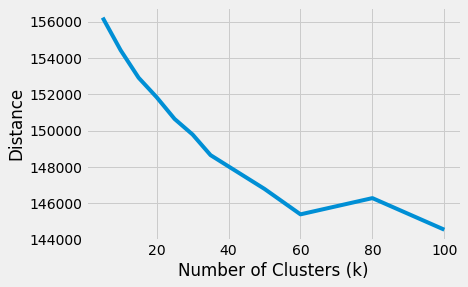

In [35]:
# 25mins
# Apply KMeans for clustering
#‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
#Maximum number of iterations of the k-means algorithm for a single run.

range_n_clusters = [5,10,15,20,25,30,35,40,50,60,80,100]
avg_distance=[]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=2000, random_state=42).fit(X)
  avg_distance.append(clusterer.inertia_)

style.use("fivethirtyeight")
plt.plot(range_n_clusters, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

# km = KMeans(n_clusters=8, init='k-means++', max_iter=2000,random_state=42)
# km.fit(X)

# # Evaluate the 5 clusters 
# # Coefficient: more similar within clusters, more distant between clusters
# # The higher the better (-1 to 1)

# print("Coefficient for 8 clusters: %0.3f"
#       % metrics.silhouette_score(X, km.labels_))

In [45]:
#20 mins
#‘k-means++’ : selects initial cluster centers for k-mean clustering in a smart way to speed up convergence.
#Maximum number of iterations of the k-means algorithm for a single run.

range_n_clusters = [5,10,20,30,40,50,60,70,80]
avg_distance=[]
silhouette_score=[]
for n_clusters in range_n_clusters:
  clusterer = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=2000, random_state=42).fit(X)
  avg_distance.append(clusterer.inertia_)
  silhouette_score.append(metrics.silhouette_score(X, clusterer.labels_))

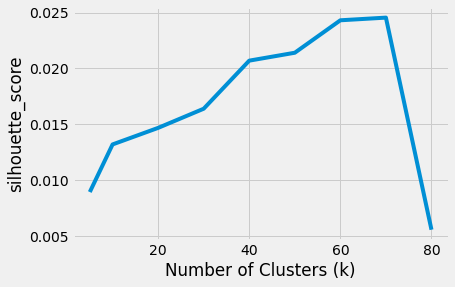

In [50]:
style.use("fivethirtyeight")
plt.plot(range_n_clusters, silhouette_score)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("silhouette_score")
#plt.title("silhouetter score Vs number of clusters")
plt.show()


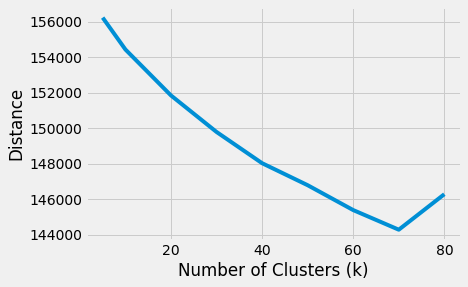

In [46]:
style.use("fivethirtyeight")
plt.plot(range_n_clusters, avg_distance)
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Distance")
plt.show()

# # Evaluate the 5 clusters 
# # Coefficient: more similar within clusters, more distant between clusters
# # The higher the better (-1 to 1)

# print("Coefficient for 8 clusters: %0.3f"
#       % metrics.silhouette_score(X, km.labels_))

In [53]:
def print_terms(cm, num):
    original_space_centroids = cm.cluster_centers_
    order_centroids = original_space_centroids.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names()
    for i in range(num):
        print("Cluster %d:" % i, end='')
        for ind in order_centroids[i, :15]:
            print(' %s' % terms[ind], end='')
        print()


print_terms(clusterer, 15)

Cluster 0: ecosystem minute wfh impacted startup survey exposed faced facebook face eye extremely expo export exposure
Cluster 1: test positive tested negative result kit swab football player rapid staff quarantine passenger trump pcr
Cluster 2: recover economy help business may china world global impact pandemic faster patient crisis industry economic
Cluster 3: sad delhi win race york episode two state india crisis corona every everyday faced estimate
Cluster 4: imported case including community infection report 10 12 13 15 11 italy none asia 18
Cluster 5: stayathome stayhome socialdistancing coronaviruspandemic covid_19 coronavirusoutbreak covid2019 phase2 infection circuitbreaker 57 circuitbreakersg 58 home 56
Cluster 6: digital pandemic business fintech marketing world technology read service banking global innovation crisis company economy
Cluster 7: bad news corona worse like many china getting pandemic case see math way everyone india
Cluster 8: blood patient plasma type study 

# **Topic modeling: Gensim's LDA model**

In [ ]:
# def pre_process(text):
#     tokens = nltk.word_tokenize(text)
#     tokens=[ WNlemma.lemmatize(t.lower()) for t in tokens]
#     tokens=[ t for t in tokens if t not in set(stopwords.words('english')+custom_stopwords)]
#     tokens = [ t for t in tokens if len(t) >= 3 ]
#     tokens = [ t for t in tokens if not re.match('(https?:)?//(?:[-\w.]|%[\da-fA-F]{2})+', t)]
#     return(tokens)

In [37]:
!pip install gensim==3.8

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 24.2 MB 1.6 MB/s 
  Attempting uninstall: gensim
    Found existing installation: gensim 3.6.0
    Uninstalling gensim-3.6.0:
      Successfully uninstalled gensim-3.6.0


In [55]:
from gensim.models.coherencemodel import CoherenceModel

In [54]:
import gensim
from gensim import corpora

docs = toks.copy()
# create dictionary of all words in all documents
dictionary = gensim.corpora.Dictionary(docs)

# filter extreme cases out of dictionary
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# create BOW dictionary
corpus = [dictionary.doc2bow(doc) for doc in docs]


In [56]:
# evaluate LDA model performance + find the optimal number of topics
#https://datascienceplus.com/evaluation-of-topic-modeling-topic-coherence/

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.LdaMulticore(corpus, 
                                         num_topics=num_topics, 
                                         id2word=dictionary, 
                                         passes=4,
                                         workers=2,
                                         random_state=21)
        #model=LdaModel(corpus=corpus, id2word=dictionary, num_topics=num_topics)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

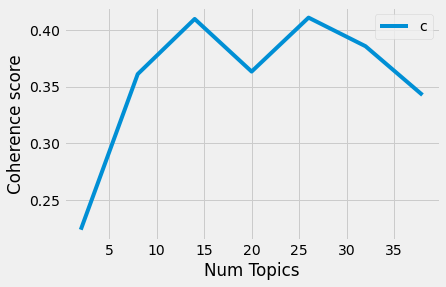

In [57]:
model_list, coherence_values = compute_coherence_values(dictionary=dictionary, corpus=corpus, texts=docs, start=2, limit=40, step=6)
# Show graph
import matplotlib.pyplot as plt
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [58]:
coherence_values

[0.2236423096081338,
 0.360962120623387,
 0.4095991898775095,
 0.36318537762528946,
 0.4107777998694454,
 0.3855442914297089,
 0.34252057043260725]

In [ ]:
coherence_values # 2, 8, 14, 20, 26, 32, 38

[0.19962241782653234,
 0.3852660355842319,
 0.4048537270009135,
 0.3942612080104863,
 0.3726389145980853,
 0.3701393455715137,
 0.36986410429852407]

In [59]:
# 4mins vs 20mins if not use LdaMulticore
# create LDA model based on optimal topic numbers from above
# further adjust parameters alpha = .1, beta = .01 or .001, etc., to improve the model
lda_model = gensim.models.LdaMulticore(corpus, 
                                         num_topics=15, 
                                         id2word=dictionary, 
                                         passes=4, 
                                         workers=2,
                                         random_state=21)

# for each topic, print words occuring in that topic
for idx, topic in lda_model.print_topics(-1):
    print('Topic: {} \nWords: {}'.format(idx, topic))

Topic: 0 
Words: 0.123*"vaccine" + 0.043*"china" + 0.016*"pfizer" + 0.013*"trump" + 0.013*"first" + 0.012*"chinese" + 0.011*"vaccination" + 0.009*"president" + 0.008*"treatment" + 0.008*"australia"
Topic: 1 
Words: 0.024*"worker" + 0.022*"pandemic" + 0.021*"job" + 0.012*"cruise" + 0.011*"amid" + 0.009*"health" + 0.008*"’" + 0.007*"many" + 0.006*"food" + 0.006*"migrant"
Topic: 2 
Words: 0.035*"2020" + 0.020*"dec" + 0.017*"month" + 0.015*"lockdown" + 0.014*"restriction" + 0.012*"travel" + 0.011*"nov" + 0.011*"update" + 0.011*"hit" + 0.010*"end"
Topic: 3 
Words: 0.052*"mask" + 0.029*"face" + 0.027*"south" + 0.022*"second" + 0.021*"wave" + 0.020*"korea" + 0.013*"first" + 0.012*"wear" + 0.010*"taiwan" + 0.010*"wearing"
Topic: 4 
Words: 0.061*"test" + 0.040*"positive" + 0.022*"testing" + 0.021*"patient" + 0.019*"’" + 0.018*"tested" + 0.015*"study" + 0.013*"hospital" + 0.012*"report" + 0.012*"result"
Topic: 5 
Words: 0.020*"business" + 0.016*"support" + 0.014*"read" + 0.014*"pandemic" + 0.009

In [60]:
##Evaluate the coherence score of LDA models
'''
u_mass:prefer the model close to 0 
c_v: [0,1], prefer bigger value   
Do not fully rely on the coherence score
'''
from gensim.models.coherencemodel import CoherenceModel
cm_umass = CoherenceModel(lda_model,  dictionary=dictionary, corpus=corpus, coherence='u_mass')
cm_cv = CoherenceModel(lda_model,  dictionary=dictionary, texts=docs, coherence='c_v')
lda_umass = cm_umass.get_coherence()
lda_cv = cm_cv.get_coherence()
print(lda_umass)
print(lda_cv)

-4.897255764801729
0.381995851530509


In [61]:
from gensim.test.utils import datapath

In [62]:
# Save model to disk.
temp_file = datapath("LDA_model_15")
lda_model.save(temp_file)

In [63]:
# Load a potentially pretrained model from disk.
temp_file = datapath("LDA_model_15")
lda_model = gensim.models.ldamodel.LdaModel.load(temp_file)
########################Query, the model using new, unseen documents

In [64]:
!pip install pyLDAvis==2.1.2

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.6 MB 29.9 MB/s 
  Created wheel for pyLDAvis: filename=pyLDAvis-2.1.2-py2.py3-none-any.whl size=97738 sha256=8309855293c4d3b46ca2c717409a6142ba6c539e6e6637918349f15b6ff5754b
  Stored in directory: /root/.cache/pip/wheels/3b/fb/41/e32e5312da9f440d34c4eff0d2207b46dc9332a7b931ef1e89
Successfully built pyLDAvis


In [65]:
import pyLDAvis
import pyLDAvis.gensim
import pickle
# Visualize the topics
pyLDAvis.enable_notebook()
LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, dictionary)
pyLDAvis.display(LDAvis_prepared)

/usr/local/lib/python3.7/dist-packages/pyLDAvis/_prepare.py:232: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  head(R).drop('saliency', 1)


In [67]:
##Note that different runs result in different but simillar results if random_state is not specified
##Label the topics based on representing "topic_words"

# Get the topic distribution of documents
doc_topics = lda_model.get_document_topics(corpus)

from operator import itemgetter
#show the topic distributions for the first 5 docs, 
for i in range(0, 5):
    print(doc_topics[i])
    print(max(doc_topics[i], key=itemgetter(1))[0]) 

[(2, 0.13036546), (3, 0.2850675), (4, 0.23689732), (5, 0.0822998), (12, 0.10071577), (13, 0.10993582)]
3
[(2, 0.1303451), (3, 0.28506744), (4, 0.23689316), (5, 0.08212801), (12, 0.10071573), (13, 0.11013229)]
3
[(0, 0.013356045), (1, 0.21407221), (2, 0.4134333), (3, 0.013356045), (4, 0.013356276), (5, 0.013356045), (6, 0.013356045), (7, 0.013356045), (8, 0.21222164), (9, 0.013356045), (10, 0.013356045), (11, 0.013356045), (12, 0.013356052), (13, 0.013356057), (14, 0.013356046)]
2
[(0, 0.51267016), (9, 0.23620287), (11, 0.15103799)]
0
[(0, 0.022222646), (1, 0.022222668), (2, 0.022222659), (3, 0.3562793), (4, 0.022222646), (5, 0.35482612), (6, 0.022222646), (7, 0.022222646), (8, 0.022222713), (9, 0.022222646), (10, 0.022222651), (11, 0.022222696), (12, 0.022222646), (13, 0.022222651), (14, 0.022222647)]
3


In [122]:
tweets['Text'][6]

'Top Japanese Official: Rename W.H.O. To ‘China Health Organization,’ Use ‘Wuhan Virus’ https://t.co/8xYQ4tSUp0'

In [68]:
#Select the best topic (with highest score) for each document
top_topic = [ max(t, key=itemgetter(1))[0] for t in doc_topics ]
print (top_topic)

[3, 3, 2, 0, 3, 0, 0, 13, 2, 13, 14, 5, 5, 1, 4, 1, 10, 1, 2, 12, 6, 5, 2, 12, 11, 11, 3, 4, 12, 4, 6, 8, 2, 12, 6, 11, 11, 11, 11, 13, 12, 13, 0, 10, 12, 5, 12, 6, 8, 7, 6, 7, 13, 11, 1, 0, 13, 13, 13, 13, 13, 6, 0, 0, 0, 0, 13, 13, 12, 4, 6, 11, 6, 5, 9, 12, 13, 4, 8, 0, 3, 7, 2, 12, 8, 7, 6, 8, 0, 8, 8, 0, 3, 14, 1, 5, 12, 7, 0, 12, 11, 5, 11, 2, 0, 6, 12, 11, 14, 14, 5, 8, 2, 2, 8, 10, 5, 4, 12, 6, 5, 8, 9, 4, 6, 7, 2, 4, 1, 5, 12, 1, 2, 2, 12, 13, 12, 0, 8, 12, 13, 6, 4, 6, 10, 12, 2, 4, 10, 10, 10, 10, 5, 5, 0, 12, 5, 2, 5, 5, 5, 8, 13, 12, 8, 4, 5, 1, 5, 6, 8, 8, 9, 12, 12, 12, 12, 8, 10, 1, 14, 8, 12, 12, 11, 10, 3, 5, 5, 2, 12, 5, 12, 11, 12, 12, 11, 2, 9, 2, 6, 9, 12, 8, 3, 2, 6, 1, 13, 12, 1, 8, 1, 5, 2, 1, 8, 2, 6, 0, 0, 6, 6, 12, 10, 3, 13, 1, 1, 4, 1, 8, 12, 8, 8, 12, 8, 5, 6, 14, 5, 7, 4, 2, 2, 0, 1, 2, 6, 6, 6, 5, 8, 0, 13, 5, 0, 4, 8, 12, 6, 14, 8, 9, 5, 12, 5, 12, 8, 7, 5, 2, 1, 4, 6, 12, 1, 12, 14, 10, 14, 6, 13, 1, 12, 12, 5, 10, 12, 10, 1, 1, 3, 5, 8, 10, 2, 3, 5, 

In [70]:
len(top_topic)

161389

In [72]:
tweets['top_topic'] = top_topic

In [ ]:
dict = {0: 'Love', 1: 'school', 2: 'young_crime', 3: 'politic', 4:'war'}

In [ ]:
topics_perDoc = [ dict[t] for t in top_topic ]
print (topics_perDoc)

['Love', 'Love', 'war', 'politic', 'Love', 'school', 'politic', 'war', 'Love', 'Love', 'Love', 'politic', 'Love', 'politic', 'school', 'politic', 'politic', 'politic', 'Love', 'politic', 'war', 'Love', 'politic', 'politic', 'war', 'politic', 'Love', 'politic', 'politic', 'politic', 'war', 'politic', 'school', 'war', 'war', 'war', 'war', 'war', 'war', 'politic', 'war', 'politic', 'school', 'school', 'politic', 'Love', 'Love', 'politic', 'politic', 'politic', 'war', 'politic', 'politic', 'Love', 'politic', 'Love', 'war', 'war', 'war', 'war', 'war', 'war', 'war', 'war', 'war', 'war', 'war', 'politic', 'politic', 'war', 'politic', 'politic', 'politic', 'politic', 'school', 'politic', 'war', 'school', 'politic', 'politic', 'Love', 'politic', 'politic', 'war', 'school', 'Love', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'school', 'Love', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'politic', 'Love', 'school', 'politic', 'war', 'politic'

In [ ]:
####################################### How many dos in each topic?
labels, counts = np.unique(topics_perDoc, return_counts=True)
print (labels)
print (counts)

# **Topic Modeling - GSDMM**

In [74]:
!pip install git+https://github.com/rwalk/gsdmm.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/rwalk/gsdmm.git to /tmp/pip-req-build-rpy_exc9
  Running command git clone -q https://github.com/rwalk/gsdmm.git /tmp/pip-req-build-rpy_exc9


In [75]:
# 21 mins
# importing libraries
from gsdmm import MovieGroupProcess

# cast tweets to numpy array
# docs = df.tweet_text.to_numpy()

# create dictionary of all words in all documents
dictionary = gensim.corpora.Dictionary(docs)

# filter extreme cases out of dictionary
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=100000)

# create variable containing length of dictionary/vocab
vocab_length = len(dictionary)

# create BOW dictionary
corpus = [dictionary.doc2bow(doc) for doc in docs]

# initialize GSDMM
gsdmm = MovieGroupProcess(K=15, alpha=0.1, beta=0.3, n_iters=15)

# fit GSDMM model
y = gsdmm.fit(docs, vocab_length)

In stage 0: transferred 143207 clusters with 15 clusters populated
In stage 1: transferred 100401 clusters with 15 clusters populated
In stage 2: transferred 60411 clusters with 15 clusters populated
In stage 3: transferred 43156 clusters with 15 clusters populated
In stage 4: transferred 36392 clusters with 15 clusters populated
In stage 5: transferred 32976 clusters with 15 clusters populated
In stage 6: transferred 30496 clusters with 15 clusters populated
In stage 7: transferred 29143 clusters with 15 clusters populated
In stage 8: transferred 28110 clusters with 15 clusters populated
In stage 9: transferred 27556 clusters with 15 clusters populated
In stage 10: transferred 27080 clusters with 15 clusters populated
In stage 11: transferred 26651 clusters with 15 clusters populated
In stage 12: transferred 26152 clusters with 15 clusters populated
In stage 13: transferred 25993 clusters with 15 clusters populated
In stage 14: transferred 25721 clusters with 15 clusters populated


In [76]:
# print number of documents per topic
doc_count = np.array(gsdmm.cluster_doc_count)
print('Number of documents per topic :', doc_count)

# Topics sorted by the number of document they are allocated to
top_index = doc_count.argsort()[-15:][::-1]
print('Most important clusters (by number of docs inside):', top_index)

# define function to get top words per topic
def top_words(cluster_word_distribution, top_cluster, values):
    for cluster in top_cluster:
        sort_dicts = sorted(cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:values]
        print("\nCluster %s : %s"%(cluster, sort_dicts))

# get top words in topics
top_words(gsdmm.cluster_word_distribution, top_index, 20)

Number of documents per topic : [11277 12259 11986  7122 15715  4217 10315  3401 14167 11203 12992 15575
 11374 12124  7662]
Most important clusters (by number of docs inside): [ 4 11  8 10  1 13  2 12  0  9  6 14  3  5  7]

Cluster 4 : [('case', 2669), ('lockdown', 1379), ('’', 1336), ('china', 1312), ('pandemic', 1074), ('death', 961), ('state', 911), ('trump', 859), ('outbreak', 713), ('south', 696), ('country', 685), ('health', 592), ('uk', 590), ('surge', 589), ('amid', 561), ('restriction', 553), ('record', 547), ('government', 537), ('first', 531), ('infection', 519)]

Cluster 11 : [('’', 4638), ('corona', 2349), ('like', 1626), ('😭', 1454), ('home', 778), ('see', 750), ('hope', 736), ('️', 714), ('😂', 712), ('end', 675), ("i'm", 637), ('stay', 635), ('life', 591), ('since', 518), ('away', 513), ('friend', 507), ('soon', 499), ('month', 484), ('miss', 482), ('make', 478)]

Cluster 8 : [('business', 2462), ('pandemic', 2010), ('’', 1597), ('read', 1471), ('digital', 1402), ('inno

In [77]:
# import library from gensim  
from gensim.models import CoherenceModel

# define function to get words in topics
def get_topics_lists(model, top_clusters, n_words):
    '''
    Gets lists of words in topics as a list of lists.
    
    model: gsdmm instance
    top_clusters:  numpy array containing indices of top_clusters
    n_words: top n number of words to include
    
    '''
    # create empty list to contain topics
    topics = []
    
    # iterate over top n clusters
    for cluster in top_clusters:
        #create sorted dictionary of word distributions
        sorted_dict = sorted(model.cluster_word_distribution[cluster].items(), key=lambda k: k[1], reverse=True)[:n_words]
         
        #create empty list to contain words
        topic = []
        
        #iterate over top n words in topic
        for k,v in sorted_dict:
            #append words to topic list
            topic.append(k)
            
        #append topics to topics list    
        topics.append(topic)
    
    return topics

# get topics to feed to coherence model
topics = get_topics_lists(gsdmm, top_index, 15) 

# evaluate model using Topic Coherence score
cm_gsdmm = CoherenceModel(topics=topics, 
                          dictionary=dictionary, 
                          corpus=corpus, 
                          texts=docs, 
                          coherence='c_v')

# get coherence value
coherence_gsdmm = cm_gsdmm.get_coherence()  

print(coherence_gsdmm)

0.42544267001245356


In [ ]:
# Import wordcloud library
from wordcloud import WordCloud

# Get topic word distributions from gsdmm model
cluster_word_distribution = gsdmm.cluster_word_distribution

# Select topic you want to output as dictionary (using topic_number)
topic_number = 1
values = 10
topic_dict = sorted(cluster_word_distribution[topic_number].items(), key=lambda k: k[1], reverse=True)[:values]

# Generate a word cloud image
wordcloud = WordCloud(background_color='#fcf2ed', 
                            width=1800,
                            height=700,
                            font_path=path_to_font,
                            colormap='flag').generate_from_frequencies(topic_dict)

# Print to screen
fig, ax = plt.subplots(figsize=[20,10])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off");

# Save to disk
wordcloud_24.to_file(path_to_file)

NameError: ignored

In [ ]:
wordcloud = WordCloud(background_color='#fcf2ed', 
                            width=1800,
                            height=700
                            ).generate_from_frequencies(topic_dict)

AttributeError: ignored

In [1]:
topic_dict

NameError: ignored

# **Sentiment analysis using Vader**

Remove hyperlinks, URLs, user mentions and excessive spaces. We did not remove emoticons, hashtags and retained the punctuations and original case of the words as they may affect the results of the sentiment and emotion classification.

In [78]:
!pip install vaderSentiment

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 125 kB 30.0 MB/s 


In [79]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [80]:
vader_obj = SentimentIntensityAnalyzer()

In [81]:
tweets['sentVaderScore']=None
tweets['sentVader']=None

In [82]:
#30s
tweets['sentVaderScore'] = tweets['Text'].apply(lambda x: vader_obj.polarity_scores(x)['compound']) # tweets['Text'].apply or toks.apply

In [83]:
neutral_thresh = 0.05
# Convert Vader compound sentiment score into sentiment categories
tweets['sentVader'] = tweets['sentVaderScore'].apply(lambda c: 'positive' if c >= neutral_thresh else ('negative' if c <= -(neutral_thresh) else 'neutral'))


In [84]:
mappings = {'very negative':'negative','very positive':'positive'}
tweets['sentiment_category'] = tweets['sentiment_category'].replace(mappings)

In [85]:
(tweets['sentVader']!=tweets['sentiment_category']).sum()

78160

In [86]:
import seaborn as sns

In [87]:
tweets['date_stamp'] = pd.to_datetime(tweets['date_stamp'])

In [88]:
tweets['week'] = tweets['date_stamp'].dt.week

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  """Entry point for launching an IPython kernel.


In [89]:
df = tweets.groupby(['week','sentVader']).agg(count_sent = ("sentVader", 'count'))

In [90]:
df = df.reset_index()

In [91]:
sns.set(rc={'figure.figsize':(16,8)})

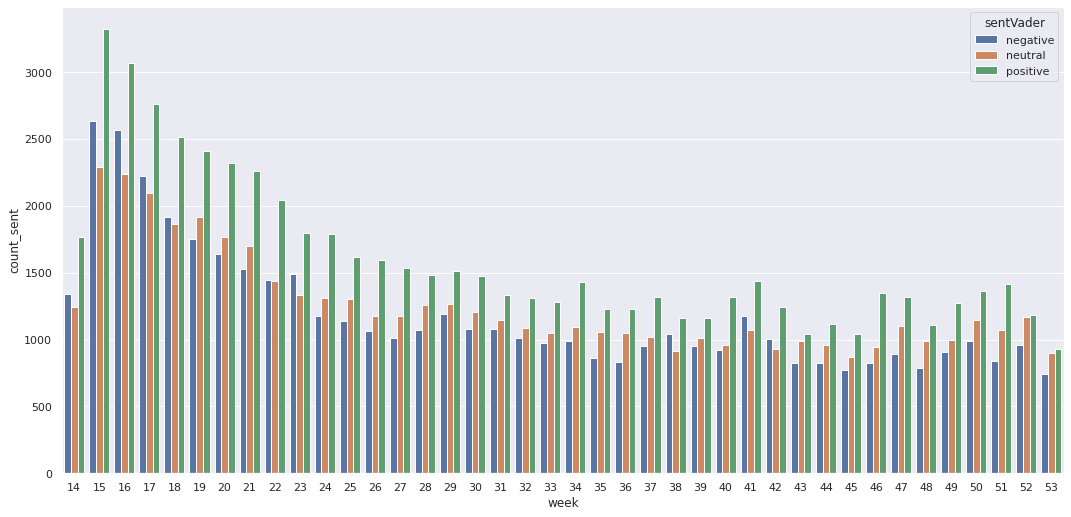

In [92]:
sns.barplot(data=df,
            x="week",
           y="count_sent",
           hue="sentVader"
           )

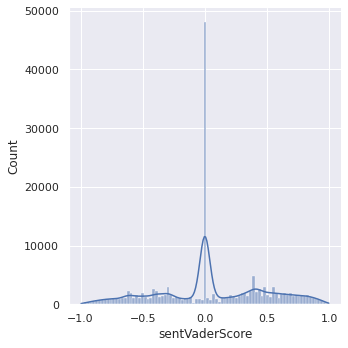

In [93]:
sns.displot(data=tweets, x='sentVaderScore', kde=True) # , col="time"

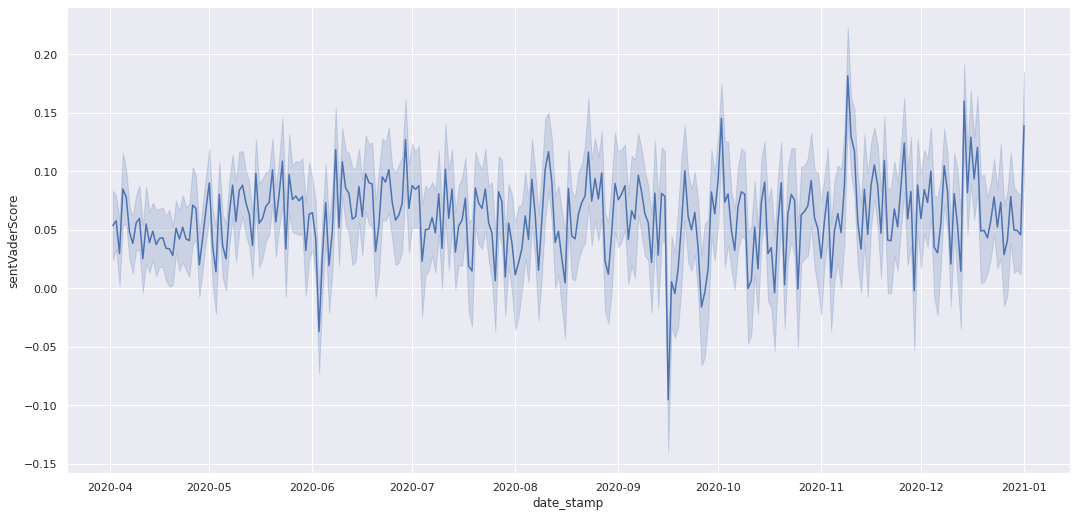

In [94]:
sns.lineplot(data = tweets, x='date_stamp' , y='sentVaderScore' ) # why surge of negative or positive sentiment

In [95]:
tweets.to_pickle('tweets_results.pkl')

# **???Sentiment analysis - supervised learning (500?)**

# **Emotion analysis using EmoRoBERTa**

In [97]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 5.5 MB 30.2 MB/s 
     |████████████████████████████████| 7.6 MB 38.1 MB/s 
     |████████████████████████████████| 163 kB 70.1 MB/s 


Video: 
Hugging Face NLP Tutorials
Text Emotion Detection in Python Hugging Face | Applied NLP Tutorial

In [103]:
from transformers import RobertaTokenizerFast, TFRobertaForSequenceClassification, pipeline

tokenizer = RobertaTokenizerFast.from_pretrained("arpanghoshal/EmoRoBERTa")
model = TFRobertaForSequenceClassification.from_pretrained("arpanghoshal/EmoRoBERTa")

emotion = pipeline('sentiment-analysis', 
                    model='arpanghoshal/EmoRoBERTa')

emotion_labels = emotion("Thanks for using it.")
print(emotion_labels)

Downloading:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/798k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/456k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/239 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.72k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/501M [00:00<?, ?B/s]

All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.
All model checkpoint layers were used when initializing TFRobertaForSequenceClassification.

All the layers of TFRobertaForSequenceClassification were initialized from the model checkpoint at arpanghoshal/EmoRoBERTa.
If your task is similar to the task the model of the checkpoint was trained on, you can already use TFRobertaForSequenceClassification for predictions without further training.


[{'label': 'gratitude', 'score': 0.9964383840560913}]


In [104]:
tweets['emotionScore']=None
tweets['emotion']=None

In [105]:
tweets_sample = tweets.sample(frac = 0.03) # ~5k

In [106]:
#16mins for 1.6k tweets. 1min for 100.
tweets_sample['emotionScore'] = tweets_sample['Text'].apply(lambda x: emotion(x)[0]['score']) # Text or toks

In [107]:
# 13mins for 1.6k tweets
tweets_sample['emotion'] = tweets_sample['Text'].apply(lambda x: emotion(x)[0]['label']) # Text or toks

In [108]:
tweets_sample.to_pickle('tweets_sample_results.pkl')

In [109]:
df_test1 = pd.read_pickle('tweets_sample_results.pkl')

In [119]:
df_test1.head(3)

,_id,tweet_ID,user_ID,t1,t2,t3,t4,t5,t6,t7,...,country_region,date_stamp,Text,tokens,top_topic,sentVaderScore,sentVader,week,emotionScore,emotion
111570,63463a317380598a23650981,1305337941237985281,56528129.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Singapore,2020-09-14,Battling pandemic fatigue: Some feel burned out as Covid-19 outbreak drags on with no end in sight https://t.co/3BbghJqwcF,"['battling', 'pandemic', 'fatigue', 'feel', 'burned', 'covid', '19', 'outbreak', 'drag', 'no', 'end', 'sight', 'URL']",2,-0.7184,negative,38,0.685809,neutral
48654,634638787380598a236413bc,1263316806472593408,27378369.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,...,Singapore,2020-05-21,WHO records highest daily number of COVID-19 cases\n\nhttps://t.co/Bf40cF633g,"['who', 'record', 'highest', 'daily', 'number', 'covid', '19', 'case', 'URL']",14,0.0772,positive,21,0.974780,neutral
152076,63463b567380598a2365a7bb,1338055069372018689,261037494.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Singapore,2020-12-13,"7 new COVID-19 cases in Singapore, all imported https://t.co/NDHBs7ehcy https://t.co/zC3hcmXo3F","['7', 'new', 'covid', '19', 'case', 'singapore', 'imported', 'URL', 'URL']",14,0.0000,neutral,50,0.919196,neutral


In [111]:
df_emotion = tweets_sample.groupby(['week','emotion']).agg(count_emotion = ("emotion", 'count')).reset_index()

In [112]:
df_emotion = df_emotion[df_emotion['emotion']!='neutral'].reset_index()

In [113]:
df_emotion['count_emotion']

0      3
1      5
2      7
3      5
4      6
      ..
601    1
602    1
603    2
604    1
605    2
Name: count_emotion, Length: 606, dtype: int64

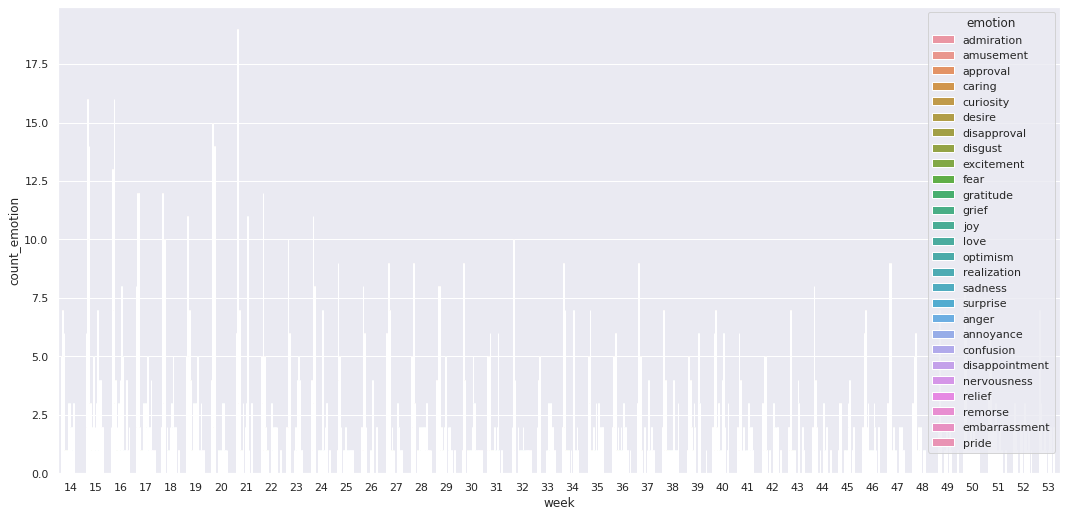

In [114]:
sns.barplot(data=df_emotion,
            x="week",
           y="count_emotion",
           hue="emotion"
           )

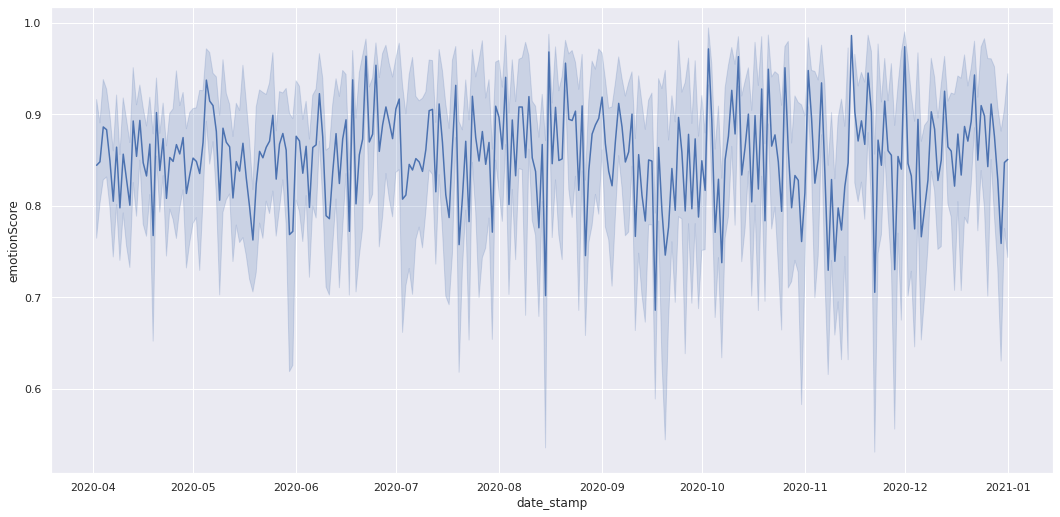

In [115]:
sns.lineplot(data = tweets_sample, x='date_stamp' , y='emotionScore' ) # why surge of negative or positive sentiment

In [ ]:
df_test = tweets.sample(n=10)

In [ ]:
for index, row in df_test.iterrows():
  print(row['Text'],'\n', row['emotion_category'], '\n', emotion(row['Text']),'\n', emotion(row['tokens']) )

@ByreddyShabari @CMOTamilNadu Our Indians humanity gone almost that's why god given to good gift Corona so sad. must change mind 
 sadness 
 [{'label': 'sadness', 'score': 0.9657167792320251}] 
 [{'label': 'neutral', 'score': 0.9903144240379333}]
@skinnypupp @BStrider @MsMelChen 99% of Hong Kongers reportedly wear masks and new Covid cases like Singapore were low and contained before March when residents and expats returned from countries where the virus outbreak became increasingly chaotic. 
 no specific emotion 
 [{'label': 'neutral', 'score': 0.8373966217041016}] 
 [{'label': 'neutral', 'score': 0.9973168969154358}]
@lowkeybad I hug you when covid fucking fucks off okay :') bbg💓 
 joy 
 [{'label': 'caring', 'score': 0.8093806505203247}] 
 [{'label': 'neutral', 'score': 0.7386096119880676}]
COVID-19 has changed the way businesses operate, with people needing to be able to #workfromanywhere without compromising productivity or security.

These are the solutions &amp; technologies you 

In [118]:
tweets.head(3)

,_id,tweet_ID,user_ID,t1,t2,t3,t4,t5,t6,t7,...,country_region,date_stamp,Text,tokens,top_topic,sentVaderScore,sentVader,week,emotionScore,emotion
0,634637137380598a236355ae,1245550415581716481,37874853.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Singapore,2020-04-02,HDB closes Bukit Merah branch office after second employee tests positive for Covid-19 https://t.co/hhbICSfy5o,"['hdb', 'close', 'bukit', 'merah', 'branch', 'office', 'second', 'employee', 'test', 'positive', 'covid', '19', 'URL']",3,0.5574,positive,14,None,None
1,634637137380598a236355af,1245550321511718912,44290654.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,Singapore,2020-04-02,HDB closes Bukit Merah branch office after second employee tests positive for Covid-19 https://t.co/jCxcyLPy6u,"['hdb', 'close', 'bukit', 'merah', 'branch', 'office', 'second', 'employee', 'test', 'positive', 'covid', '19', 'URL']",3,0.5574,positive,14,None,None
2,634637137380598a236355b0,1245550270190419969,115624161.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,...,Singapore,2020-04-02,Quarantine stress baking? 😆\n\nhttps://t.co/zHI3eUc5YL,"['quarantine', 'stress', 'baking', '😆', 'URL']",2,-0.0772,negative,14,None,None


Text(0.5, 1.0, 'Emotion Distribution')

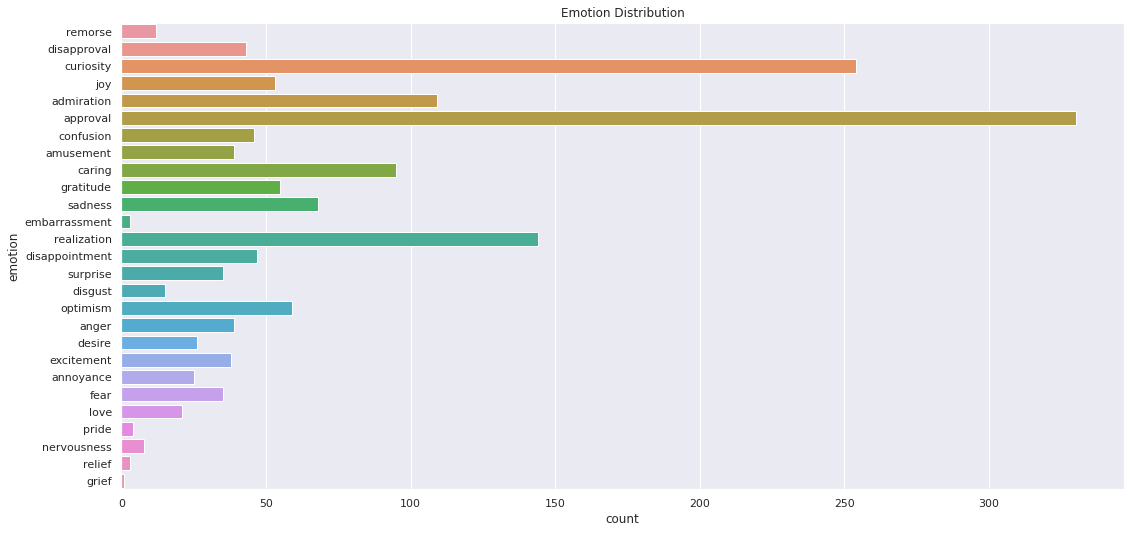

In [117]:
sns.countplot(y= tweets_sample[tweets_sample['emotion']!="neutral"]['emotion']).set_title("Emotion Distribution")

Text(0.5, 1.0, 'Emotion Distribution')

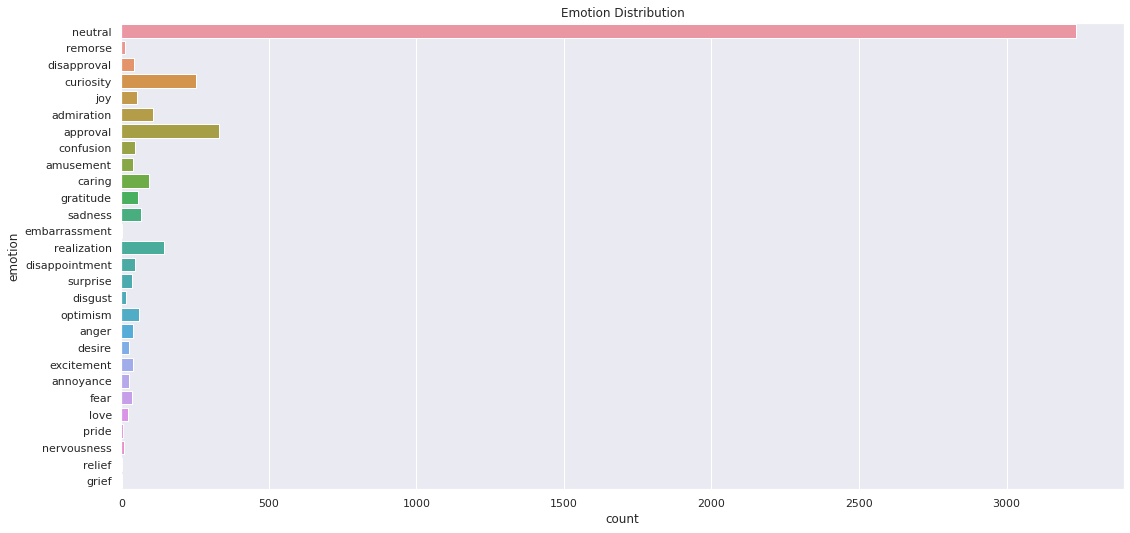

In [116]:
sns.countplot(y= tweets_sample[tweets_sample['emotion']!="neutral"]['emotion']).set_title("Emotion Distribution")

# **???Emotion analysis - Lexicon based method**